In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data_cleaning.csv')

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,some_state,age,python_ym,r_ym,spark,aws,excel
0,Data Scientist,$79K-$147K (Glassdoor est.),We are looking for Data Scientists who are int...,3.7,GovTech\n3.7,"San Francisco, CA","Singapore, Singapore",1001 to 5000 employees,2016,Government,...,113.0,GovTech\n,CA,0,4,1,0,0,0,1
1,Staff Data Scientist,$79K-$147K (Glassdoor est.),"At Vungle, our Data Scientists build systems t...",3.7,Vungle\n3.7,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2011,Company - Private,...,113.0,Vungle\n,CA,1,9,1,0,1,1,0
2,R&D Scientist,$79K-$147K (Glassdoor est.),"Here at Berkeley Lights, we think cells are aw...",4.3,Berkeley Lights\n4.3,"Emeryville, CA","Emeryville, CA",51 to 200 employees,2011,Company - Private,...,113.0,Berkeley Lights\n,CA,1,9,1,0,0,0,0
3,Machine Learning Engineer,$79K-$147K (Glassdoor est.),About Alpha Health\nWe’re on a mission to reme...,5.0,Alpha Health\n5.0,"South San Francisco, CA","South San Francisco, CA",1 to 50 employees,2018,Company - Private,...,113.0,Alpha Health\n,CA,1,2,1,0,0,1,0
4,Data Scientist #5967,$79K-$147K (Glassdoor est.),Company Overview\n\nFanatics is the global lea...,3.4,Fanatics\n3.4,"San Mateo, CA","Jacksonville, FL",5001 to 10000 employees,1996,Company - Private,...,113.0,Fanatics\n,CA,0,24,0,0,1,0,0


In [6]:
def job_title(title):
    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'N/A'

def level_of_seniority(title_label):
    if 'Senior' in title_label.lower() or 'sr' in title_label.lower() or 'lead' in title_label.lower() or 'principal' in title_label.lower():
        return 'Senior'
    elif 'jr' in title_label.lower():
        return 'jr'
    else:
        return 'N/A'

In [7]:
df['title'] = df['Job Title'].apply(job_title)

In [8]:
df.title.value_counts()

data scientist      9
N/A                 4
machine learning    1
data analyst        1
Name: title, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(level_of_seniority)

In [10]:
df.seniority.value_counts()

N/A       14
Senior     1
Name: seniority, dtype: int64

In [11]:
#df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
#df.job_state.value_counts()

In [12]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     2905
1     4453
2     4459
3     3584
4     6941
5     2947
6     3148
7     3607
8     1948
9     5387
10    3422
11    3269
12    5368
13    2098
14    3612
Name: desc_len, dtype: int64

In [13]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['Competitors']

0                                                 -1
1                          AdColony, Unity, AppLovin
2                                           Fluidigm
3                                                 -1
4                         Lids, Amazon, Under Armour
5                                                 -1
6     Illumina, Thermo Fisher Scientific, NanoString
7                                                 -1
8                                                 -1
9                                                 -1
10                                                -1
11    Illumina, Thermo Fisher Scientific, NanoString
12                  Mars, Nestlé, Godiva Chocolatier
13                                                -1
14                                          Sequenom
Name: Competitors, dtype: object

In [16]:
#hourly wage to annual 
df['salary_min'] = df.apply(lambda x: x.salary_min*2 if x.hourly ==1 else x.salary_min, axis =1)
df['salary_max'] = df.apply(lambda x: x.salary_max*2 if x.hourly ==1 else x.salary_max, axis =1)

In [17]:
df[df.hourly ==1][['hourly','salary_min','salary_max']]

,hourly,salary_min,salary_max


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_ym', 'r_ym',
       'spark', 'aws', 'excel', 'title', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [20]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                   GovTech
1                    Vungle
2           Berkeley Lights
3              Alpha Health
4                  Fanatics
5                  Carbon3D
6                  Fluidigm
7                 Metromile
8                Triplebyte
9                  Blue Owl
10                   Figure
11                 Fluidigm
12    Ghirardelli Chocolate
13              Notion Labs
14                   CareDx
Name: company_txt, dtype: object

In [21]:
df.describe()

,Rating,Founded,hourly,employer_provided,salary_min,salary_max,avg_salary,some_state,age,python_ym,r_ym,spark,aws,excel,desc_len,num_comp
count,15.000000,15.000000,15.0,15.0,15.0,15.0,15.0,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.853333,1866.000000,0.0,0.0,79.0,147.0,113.0,0.866667,19.200000,0.533333,0.0,0.333333,0.266667,0.266667,3809.866667,1.133333
std,0.724930,518.153039,0.0,0.0,0.0,0.0,0.0,0.351866,41.855534,0.516398,0.0,0.487950,0.457738,0.457738,1323.600170,1.407463
min,2.500000,-1.000000,0.0,0.0,79.0,147.0,113.0,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1948.000000,0.000000
25%,3.300000,1999.000000,0.0,0.0,79.0,147.0,113.0,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,3047.500000,0.000000
50%,3.700000,2011.000000,0.0,0.0,79.0,147.0,113.0,1.000000,7.000000,1.000000,0.0,0.000000,0.000000,0.000000,3584.000000,0.000000
75%,4.400000,2016.000000,0.0,0.0,79.0,147.0,113.0,1.000000,15.000000,1.000000,0.0,1.000000,0.500000,0.500000,4456.000000,3.000000
max,5.000000,2018.000000,0.0,0.0,79.0,147.0,113.0,1.000000,168.000000,1.000000,0.0,1.000000,1.000000,1.000000,6941.000000,3.000000


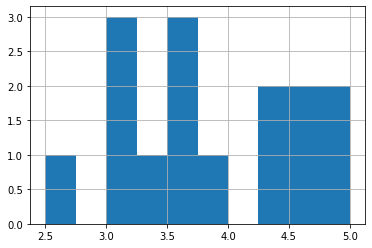

In [22]:
df.Rating.hist()

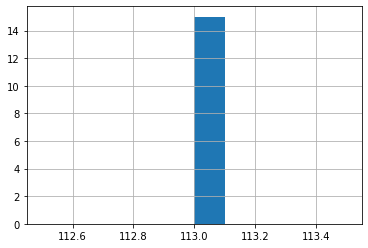

In [23]:
df.avg_salary.hist()

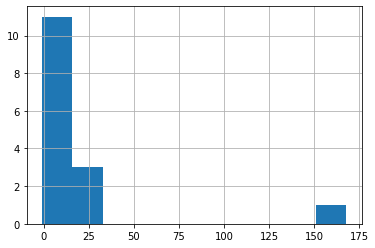

In [24]:
df.age.hist()

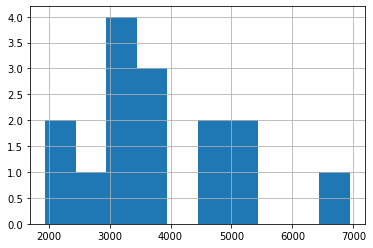

In [25]:
df.desc_len.hist()

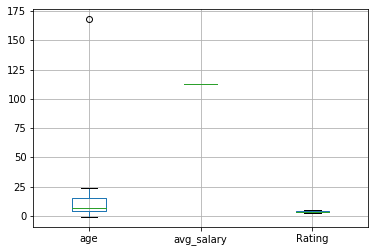

In [26]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

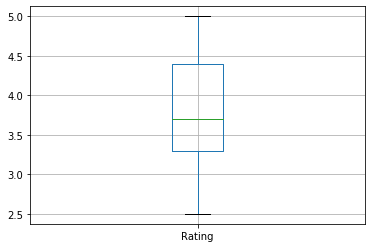

In [28]:
df.boxplot(column = 'Rating')

In [29]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,NaN,-0.198120,0.387988
avg_salary,NaN,NaN,NaN,NaN
Rating,-0.198120,NaN,1.000000,-0.089137
desc_len,0.387988,NaN,-0.089137,1.000000


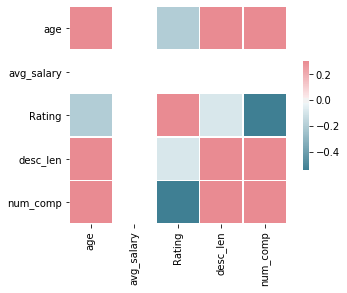

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_ym', 'r_ym',
       'spark', 'aws', 'excel', 'title', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [33]:
pd.pivot_table(df,index = 'title', values = 'avg_salary')

,avg_salary
title,
N/A,113.0
data analyst,113.0
data scientist,113.0
machine learning,113.0


In [34]:
pd.pivot_table(df, index = ['title', 'seniority'], values = 'avg_salary')

avg_salary
title            seniority            
N/A              N/A             113.0
data analyst     N/A             113.0
data scientist   N/A             113.0
                 Senior          113.0
machine learning N/A             113.0

In [36]:
pd.pivot_table(df, index = ['job_state' ,'title'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state title                       
 CA       N/A                    113.0
          data analyst           113.0
          data scientist         113.0
          machine learning       113.0

In [38]:
pd.pivot_table(df, index = ['job_state','title'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state title                       
 CA       N/A                        4
          data analyst               1
          data scientist             9
          machine learning           1

In [40]:
pd.pivot_table(df[df.title == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,113.0


In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'some_state', 'age', 'python_ym', 'r_ym',
       'spark', 'aws', 'excel', 'title', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [44]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_ym', 'r_ym', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [45]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
2.5          113.0
3.2          113.0
3.4          113.0
3.5          113.0
3.7          113.0
3.8          113.0
4.3          113.0
4.5          113.0
5.0          113.0
Industry
                                         avg_salary
Industry                                           
Biotech & Pharmaceuticals                     113.0
Computer Hardware & Software                  113.0
Enterprise Software & Network Solutions       113.0
Federal Agencies                              113.0
Food & Beverage Manufacturing                 113.0
IT Services                                   113.0
Insurance Carriers                            113.0
Internet                                      113.0
Lending                                       113.0
Sporting Goods Stores                         113.0
Sector
                           avg_salary
Sector                               
Biotech & Pharmaceuticals       113.0
Finance                       

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [46]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_ym', values = 'avg_salary', aggfunc = 'count')

python_ym,0,1
Revenue,,
$1 to $2 billion (USD),1.0,NaN
$10 to $25 million (USD),NaN,1.0
$100 to $500 million (USD),3.0,1.0
Unknown / Non-Applicable,3.0,6.0
